In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
from sir_model import *

Set parameters for the SIR model

In [2]:
# parameters
random_state = 12345
t_0 = 0
t_end = 10000
NT = t_end - t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol = 1e-8
atol = 1e-8

# SIR model parameters
beta = 11.5
A = 20
d = 0.1
nu = 1
b = 0.02  # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03 
mu0 = 10  # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

Print information about reproduction number, equilibrium and bifurcation 

In [3]:
print("Reproduction number R0 can be seen as an indicator whether the disease is going to spread or die out.")
R0_result = R0(beta, d, nu, mu1)
print("Reproduction number R0 =", R0_result)
if R0_result < 1: 
    print("The disease can be eliminated!")
    print("The disease-free equilibrium E0 is an attracting node!")
elif R0_result == 1: 
    codimension_saddle_node(A, mu0, mu1, beta, nu, b)
    print("A saddle-node bifurcation may occur, depending on the value of b relative to the critical threshold values")
else: 
    print("The disease is spreading! Think how to reduce beta or increase mu1! The result should be less than 1!")
    print("The disease-free equilibrium E0 becomes a hyperbolic saddle, and an endemic equilibrium E2 emerges. This transition signals a transcritical bifurcation.")

bifurcations = beta <= d + nu + mu0
print('The disease-free equilibrium E0 is globally asymptotically stable if beta <=d+nu+mu0, meaning there is no endemic equilibrium. This is', bifurcations)

# when beta > d+nu+mu0
if not bifurcations: 
    print("Study bifurcations!")

Reproduction number R0 can be seen as an indicator whether the disease is going to spread or die out.
Reproduction number R0 = 0.9956709956709958
The disease can be eliminated!
The disease-free equilibrium E0 is an attracting node!
The disease-free equilibrium E0 is globally asymptotically stable if beta <=d+nu+mu0, meaning there is no endemic equilibrium. This is False
Study bifurcations!


Create a simulation of solving model and visualize the results

Text(0, 0.5, 'h(I)')

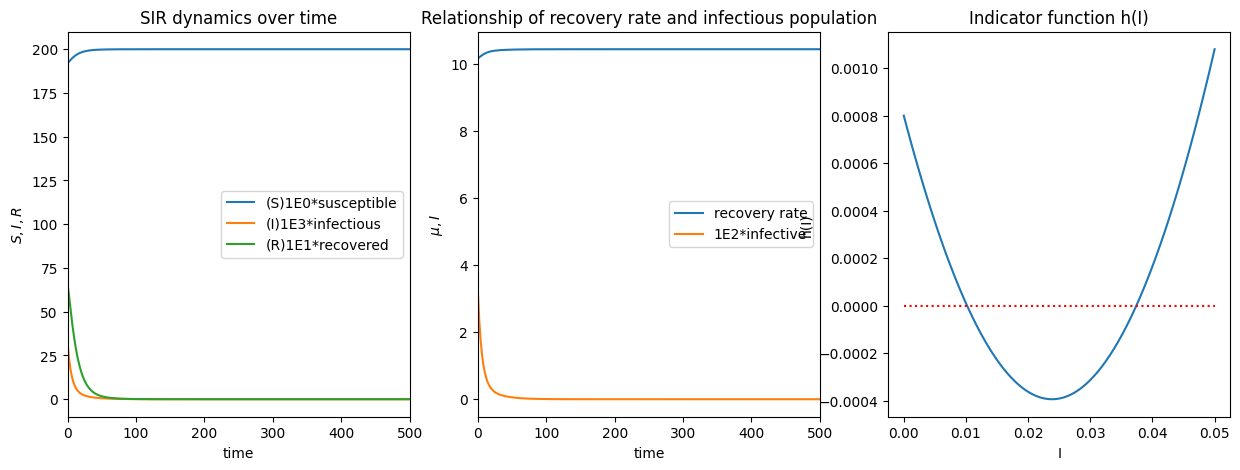

In [4]:
rng = np.random.default_rng(random_state)

# Set initial state
SIM0 = rng.uniform(low=(190, 0, 1), high=(199, 0.1, 8), size=(3,))

# Set time
time = np.linspace(t_0, t_end, NT)

# Solve the model using LSODA
sol = solve_ivp(model, t_span=[time[0], time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b),
                method='LSODA', rtol=rtol, atol=atol)

# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(sol.t, sol.y[0] - 0 * sol.y[0][0], label='(S)1E0*susceptible')
ax[0].plot(sol.t, 1e3 * sol.y[1] - 0 * sol.y[1][0], label='(I)1E3*infectious')
ax[0].plot(sol.t, 1e1 * sol.y[2] - 0 * sol.y[2][0], label='(R)1E1*recovered')
ax[0].set_xlim([0, 500])
ax[0].legend()
ax[0].set_xlabel("time")
ax[0].set_ylabel(r"$S,I,R$")
ax[0].set_title("SIR dynamics over time")

ax[1].plot(sol.t, mu(b, sol.y[1], mu0, mu1), label='recovery rate')
ax[1].plot(sol.t, 1e2 * sol.y[1], label='1E2*infective')
ax[1].set_xlim([0, 500])
ax[1].legend()
ax[1].set_xlabel("time")
ax[1].set_ylabel(r"$\mu,I$")
ax[1].set_title("Relationship of recovery rate and infectious population")

I_h = np.linspace(-0., 0.05, 100)
ax[2].plot(I_h, h(I_h, mu0, mu1, beta, A, d, nu, b))
ax[2].plot(I_h, 0 * I_h, 'r:')
#ax[2].set_ylim([-0.1,0.05])
ax[2].set_title("Indicator function h(I)")
ax[2].set_xlabel("I")
ax[2].set_ylabel("h(I)")



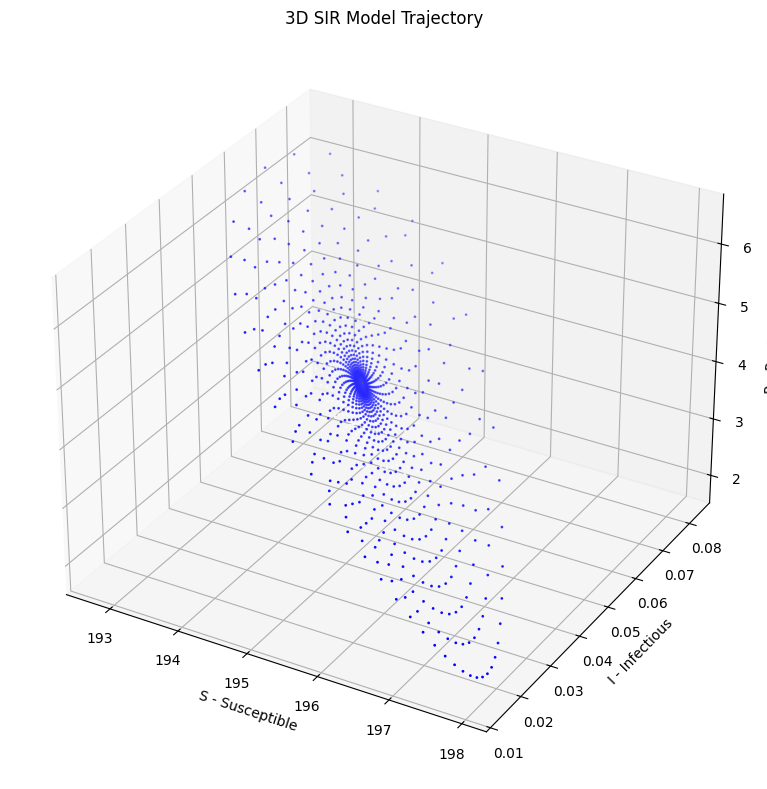

In [5]:
# Create a 3D plot
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection="3d")

# Set initial conditions for three different states
initial_conditions = [
    [195.3, 0.052, 4.4],  
    [195.7, 0.03, 3.92],  
    [193, 0.08, 6.21]    
]

# Time setup
time = np.linspace(t_0,15000,NT)

# Colormaps for different trajectories
cmap = ["BuPu", "Purples", "bwr"]

# Solve and plot for each initial state
for i, SIM0 in enumerate(initial_conditions):
    # Solve the SIR model
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap=cmap[i])


# Add labels and title
ax.set_xlabel('S - Susceptible')
ax.set_ylabel('I - Infectious')
ax.set_zlabel('R - Recovered')
ax.set_title('3D SIR Model Trajectory')

fig.tight_layout()
fig.tight_layout()

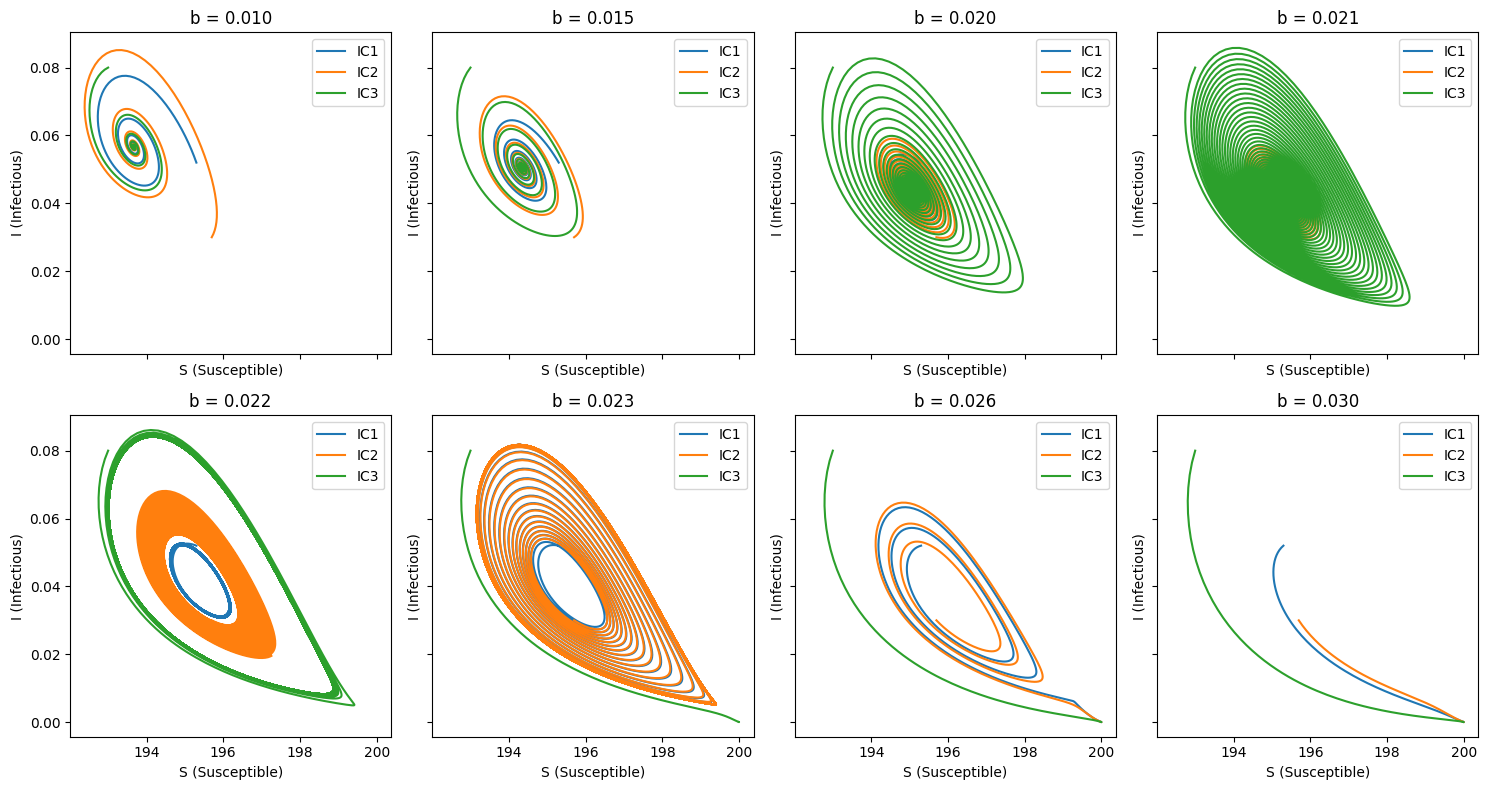

In [6]:
# implemented with the support of ChatGPT
initial_conditions = [
    [195.3, 0.052, 4.4],
    [195.7, 0.03, 3.92],
    [193, 0.08, 6.21]
]
# Time parameters (long integration time)
t_0 = 0
t_end = 5000  # Long integration for slow behavior
NT = 10000
time = np.linspace(t_0, t_end, NT)

# Parameter to test bifurcation
b_values = [0.01, 0.015, 0.020, 0.021, 0.022, 0.023, 0.026, 0.03]

# Prepare the plot
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=True)
axes = axes.ravel()

for i, b in enumerate(b_values):
    for j, SIM0 in enumerate(initial_conditions):
        sol = solve_ivp(
            model,
            t_span=[t_0, t_end],
            y0=SIM0,
            t_eval=time,
            args=(mu0, mu1, beta, A, d, nu, b),
            method='LSODA',
            rtol=rtol,
            atol=atol
        )
        
        # Plot trajectories in the (S, I) plane
        axes[i].plot(sol.y[0], sol.y[1], label=f"IC{j+1}")
        
    axes[i].set_title(f"b = {b:.3f}")
    axes[i].set_xlabel("S (Susceptible)")
    axes[i].set_ylabel("I (Infectious)")
    axes[i].legend()
plt.savefig('changes_b.pdf')
plt.tight_layout()
plt.show()